In [1]:
import pandas as pd

train_dataset = pd.read_csv('/content/drive/MyDrive/Datavidia/train_dataset_advanced.csv', index_col=0)
Y_training_df = train_dataset["main-label"]
# Drop 'label' column
X_training_df = train_dataset.drop(labels = ['main-label','main-id'],axis = 1) 
print('Y_training shape', Y_training_df.shape)
print('X_training shape', X_training_df.shape) 

Y_training shape (14856,)
X_training shape (14856, 15408)


In [4]:
import numpy as np
from tensorflow.keras.utils import to_categorical

X_training_array = X_training_df.values
X_training = np.reshape(X_training_array,(14856,48,107,3))
Y_training = to_categorical(Y_training_df.values, num_classes = 2)

In [13]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_training, Y_training, test_size = 0.3, random_state=2)
print("x_train shape",X_train.shape)
print("x_val shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_val shape",Y_val.shape)

x_train shape (10399, 48, 107, 3)
x_val shape (4457, 48, 107, 3)
y_train shape (10399, 2)
y_val shape (4457, 2)


In [35]:
from tensorflow.keras.applications import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras import optimizers
from tensorflow_addons.metrics import F1Score
#MobileNet
base_model = MobileNet(input_shape=(48,107,3),include_top=False,classifier_activation=None)
x = base_model.output
x = Flatten()(x)
predictions = Dense(2, activation='softmax')(x) 
model = Model(inputs=base_model.input, outputs=predictions)
opt = optimizers.Adam(lr=0.001)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=[F1Score(2,average='macro')])
print(model.summary())

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 48, 107, 3)]      0         
_________________________________________________________________
conv1 (Conv2D)               (None, 24, 54, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 24, 54, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 24, 54, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 24, 54, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 24, 54, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 24, 54, 32)        0   

In [36]:
epochs = 20  # for better result increase the epochs
batch_size = 100

# Fit the model
history = model.fit(X_train, Y_train, 
                    epochs = epochs, validation_data = (X_val,Y_val), batch_size=batch_size)

Epoch 1/20
104/104 [==============================] - 9s 71ms/step - loss: 0.6589 - f1_score: 0.6044 - val_loss: 0.6083 - val_f1_score: 0.4617
Epoch 2/20
104/104 [==============================] - 7s 66ms/step - loss: 0.2737 - f1_score: 0.7814 - val_loss: 0.8569 - val_f1_score: 0.4957
Epoch 3/20
104/104 [==============================] - 7s 66ms/step - loss: 0.2041 - f1_score: 0.8284 - val_loss: 1.1367 - val_f1_score: 0.4523
Epoch 4/20
104/104 [==============================] - 7s 67ms/step - loss: 0.1466 - f1_score: 0.8859 - val_loss: 0.3134 - val_f1_score: 0.7699
Epoch 5/20
104/104 [==============================] - 7s 67ms/step - loss: 0.1199 - f1_score: 0.9013 - val_loss: 0.2955 - val_f1_score: 0.7995
Epoch 6/20
104/104 [==============================] - 7s 67ms/step - loss: 0.1287 - f1_score: 0.8984 - val_loss: 0.3943 - val_f1_score: 0.6464
Epoch 7/20
104/104 [==============================] - 7s 66ms/step - loss: 0.1655 - f1_score: 0.8685 - val_loss: 0.3819 - val_f1_score: 0.7558

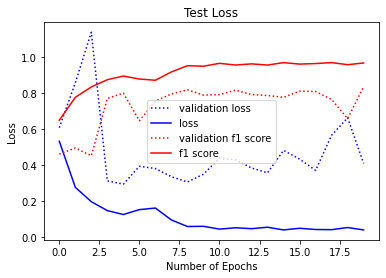

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss", linestyle=':')
plt.plot(history.history['loss'], color='b', label="loss", linestyle='-')
plt.plot(history.history['val_f1_score'], color='r', label="validation f1 score", linestyle=':')
plt.plot(history.history['f1_score'], color='r', label="f1 score", linestyle='-')
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.close()

### Test Section

In [38]:
import pandas as pd

test_dataset = pd.read_csv('/content/drive/MyDrive/Datavidia/test_dataset_advanced.csv', index_col=0)
# Drop 'label' column
X_testing_df = test_dataset.drop(labels = ['main-id'],axis = 1)
print('X_testing shape', X_testing_df.shape) 

X_testing shape (3714, 15408)


In [39]:
import numpy as np

X_testing_array = X_testing_df.values
X_testing = np.reshape(X_testing_array,(3714,48,107,3))

In [40]:
# from copy import deepcopy
# import numpy as np

# def binary_classifier(label):
#   temp = deepcopy(label)
#   for i in temp:
#     if i[0] > 0.5:
#       i[0] = 1
#     else:
#       i[0] = 0
#   return temp

In [41]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_testing)
# Y_pred_advanced = binary_classifier(Y_pred).astype(int)
Y_pred_advanced = np.argmax(Y_pred,axis = 1)
Y_pred_advanced = Y_pred_advanced.reshape(-1)
print(Y_pred_advanced)

[0 0 0 ... 0 0 1]


In [42]:
temp1 = test_dataset['main-id'].values
test_result = list(zip(list(temp1),list(Y_pred_advanced)))
test_result_df = pd.DataFrame(test_result,columns=['review_id','category'])
test_result_df

,review_id,category
0,7302180ac7160f04a405d8aa7bd6beb8,0
1,3184c670e170f565c7522eb76a320ba1,0
2,e33abf6bb5d5a9a77c339043b1725dc8,0
3,061d388950340070a6ac03fabc9027b0,0
4,e62d87c348674b6c06856964f3ab16b8,1
...,...,...
3709,4fac4c272d9194021f921138ebd5b389,0
3710,4fabd4722dd4074841f9656f75105f09,0
3711,44ff89997547d54cccb2a33776181240,0
3712,c46cf84e3665a10199a539fee919edd6,0


In [43]:
test_result_df.to_csv('/content/drive/MyDrive/Datavidia/test_result-MobileNet.csv', index=False)